## Credit Risk Modelling

In [1]:
# importing libraries for data exploration and preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



### importing data

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\datasets\loan_data_2007_2014.csv')

C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Exploration 

In [3]:
# check number of columns and data types of features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                        466285 non-null object
loan_status              

In [4]:
# create a new column based on the loan_status column that will be our target variable
data['good_bad'] = np.where(data.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
data.drop(columns = ['loan_status'], inplace = True)

In [5]:
X = data.drop('good_bad', axis = 1)
y = data['good_bad']


In [6]:
# check shape of data 
X.shape

(466285, 73)

In [7]:
# display first 10 rows
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
#show columns that have more than 70% missing values
missing_values = data.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

columns with missing values more than 70% will have to be droped because trying to impute them might lead to inaccuracies

## Irrelevant features
The follwing features are identifiers and can not be used in building model.
id, member id, url, title, desc, zipcode and emp_title

The sub_grade column wll also be droped as it contains the same information as the grade columns.

Also features that contain information about the future will not also be included in building the model since those events are yet to occur. The features include next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp and total_rec_late_fee

## Data Preparation and Preprocessing

In [9]:
#droppng of irrelevant columns and rows with missing values
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
data.drop(columns=columns_to_drop, inplace=True, axis=1)
#dropping all missing values
data.dropna(inplace=True)

In [10]:
# check shape again
data.shape

(181686, 41)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]), <a list of 14 Text yticklabel objects>)

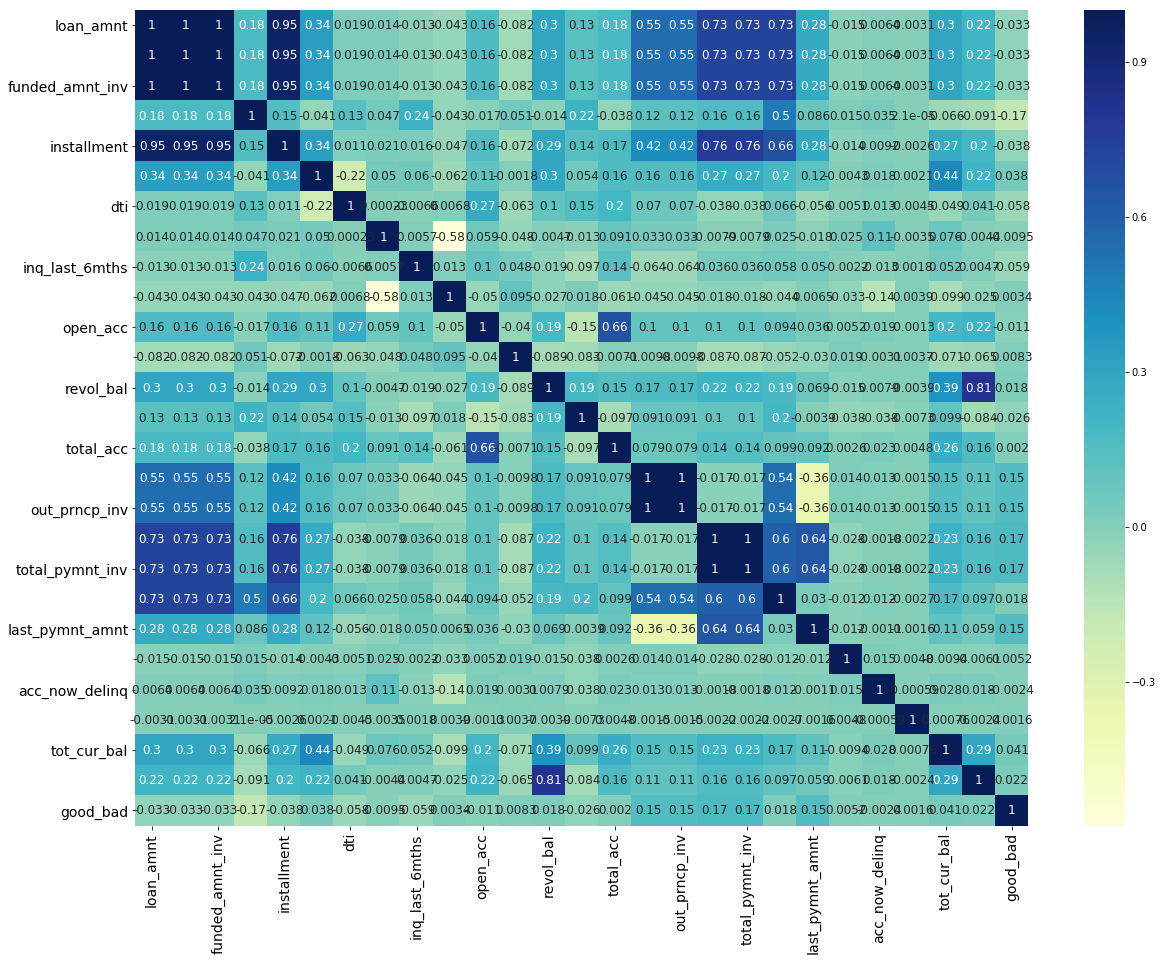

In [11]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [12]:
# droping multicollinear features 
data.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text yticklabel objects>)

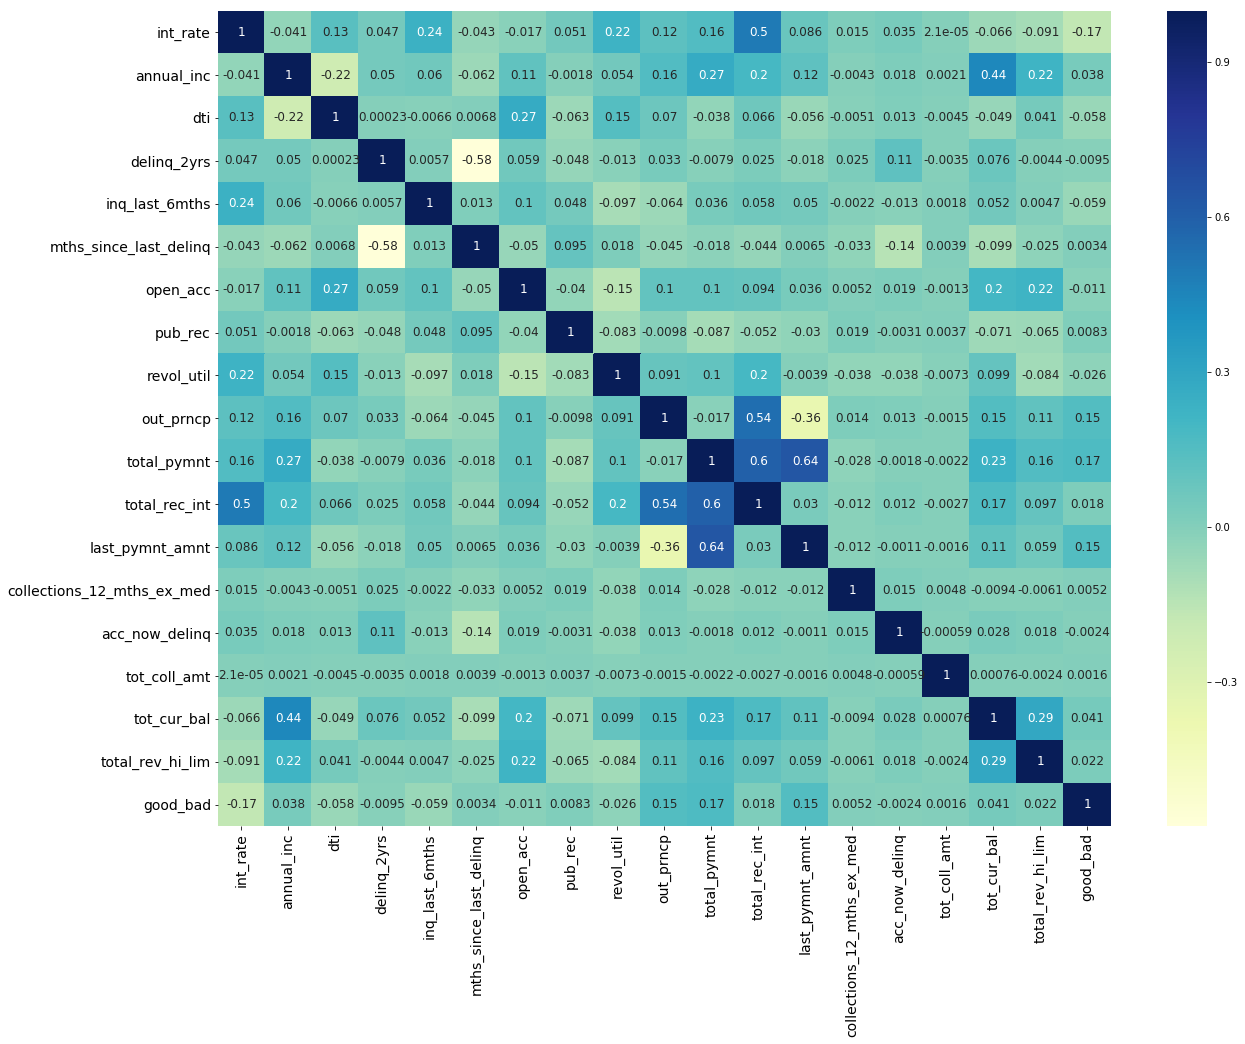

In [13]:
corr_matrix = data.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [14]:
data.shape

(181686, 33)

In [15]:
##descriptive statistics
data.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
count,181686.000000,1.816860e+05,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,1.816860e+05,1.816860e+05,1.816860e+05,181686.000000
mean,14.449868,7.886698e+04,17.389873,0.638040,0.822942,33.724167,11.756382,0.189244,56.548318,5291.496180,11215.608032,2679.857733,3146.519033,0.016418,0.009808,3.263843e+02,1.505644e+05,2.735155e+04,0.901897
std,4.252272,6.078531e+04,7.787230,1.104461,1.059299,21.716923,4.997763,0.557625,22.583195,6660.857513,7986.951463,2470.226061,5633.250884,0.149082,0.107319,2.157745e+04,1.595617e+05,4.243696e+04,0.297455
min,6.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,11.670000,5.000000e+04,11.530000,0.000000,0.000000,15.000000,8.000000,0.000000,40.300000,0.000000,5485.875000,1037.310000,321.130000,0.000000,0.000000,0.000000e+00,3.245125e+04,1.230000e+04,1.000000
50%,14.160000,6.800000e+04,16.910000,0.000000,0.000000,30.000000,11.000000,0.000000,57.400000,2637.215000,9127.115000,1925.520000,539.810000,0.000000,0.000000,0.000000e+00,9.847150e+04,2.060000e+04,1.000000
75%,17.140000,9.402825e+04,22.900000,1.000000,1.000000,49.000000,14.000000,0.000000,73.900000,8883.127500,14685.300000,3432.090000,3048.777500,0.000000,0.000000,0.000000e+00,2.255148e+05,3.400000e+04,1.000000
max,26.060000,7.500000e+06,39.990000,29.000000,7.000000,188.000000,84.000000,21.000000,892.300000,31898.770000,56087.909920,21840.000000,36170.140000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [16]:
#check datatypes of data again

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
term                          181686 non-null object
int_rate                      181686 non-null float64
grade                         181686 non-null object
emp_length                    181686 non-null object
home_ownership                181686 non-null object
annual_inc                    181686 non-null float64
verification_status           181686 non-null object
issue_d                       181686 non-null object
pymnt_plan                    181686 non-null object
purpose                       181686 non-null object
addr_state                    181686 non-null object
dti                           181686 non-null float64
delinq_2yrs                   181686 non-null float64
earliest_cr_line              181686 non-null object
inq_last_6mths                181686 non-null float64
mths_since_last_delinq        181686 non-null float64
open_acc                      1

The following variables are not in their appropriate data types and should be treated. emp_length, term, issue_d, last_pymnt_d, last_credit_pull_d and earliest_cr_line

we will define functions to help us with this process.


In [17]:
# converting emp_length to numerical column and assign nan values to zero

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    

emp_length_convert(data, 'emp_length')

data['emp_length'].unique()


array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9], dtype=int64)

In [18]:

data['emp_length'].dtype

dtype('int64')

In [19]:
# converting term column to numeric data type

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(data, 'term')

    


In [20]:
data['term'].dtype

dtype('int64')

In [21]:
# preprocessing date columns 

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(data, 'issue_d')
date_columns(data, 'last_pymnt_d')
date_columns(data, 'last_credit_pull_d')
date_columns(data, 'earliest_cr_line')

In [22]:
# checking for missing values again 

missing_values = data.isnull().sum()
missing_values[missing_values>0]/len(data)

Series([], dtype: float64)

In [23]:
# seperating categorical features from numerical
categorical_features = data.select_dtypes(exclude='number')
numerical_features = data.select_dtypes(exclude='object')

In [24]:
#checking categorical features data types
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 8 columns):
grade                  181686 non-null object
home_ownership         181686 non-null object
verification_status    181686 non-null object
pymnt_plan             181686 non-null object
purpose                181686 non-null object
addr_state             181686 non-null object
initial_list_status    181686 non-null object
application_type       181686 non-null object
dtypes: object(8)
memory usage: 12.5+ MB


In [25]:
#checking numerical features data types
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 25 columns):
term                             181686 non-null int64
int_rate                         181686 non-null float64
emp_length                       181686 non-null int64
annual_inc                       181686 non-null float64
dti                              181686 non-null float64
delinq_2yrs                      181686 non-null float64
inq_last_6mths                   181686 non-null float64
mths_since_last_delinq           181686 non-null float64
open_acc                         181686 non-null float64
pub_rec                          181686 non-null float64
revol_util                       181686 non-null float64
out_prncp                        181686 non-null float64
total_pymnt                      181686 non-null float64
total_rec_int                    181686 non-null float64
last_pymnt_amnt                  181686 non-null float64
collections_12_mths_ex_med       1

In [26]:
# converting to dataframe 

filled_data = data

In [27]:
filled_data.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,n,debt_consolidation,CT,...,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1,80.0,55.0,55.0,317.0
42538,36,13.53,B,10,RENT,40000.0,Source Verified,n,debt_consolidation,NM,...,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,80.0,59.0,55.0,262.0
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,n,debt_consolidation,FL,...,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1,80.0,55.0,55.0,269.0
42541,36,12.85,B,4,RENT,88000.0,Not Verified,n,debt_consolidation,NC,...,INDIVIDUAL,0.0,0.0,17672.0,4500.0,1,80.0,55.0,55.0,386.0
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,n,debt_consolidation,MA,...,INDIVIDUAL,0.0,0.0,39143.0,22300.0,1,80.0,55.0,55.0,370.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
term                             181686 non-null int64
int_rate                         181686 non-null float64
grade                            181686 non-null object
emp_length                       181686 non-null int64
home_ownership                   181686 non-null object
annual_inc                       181686 non-null float64
verification_status              181686 non-null object
pymnt_plan                       181686 non-null object
purpose                          181686 non-null object
addr_state                       181686 non-null object
dti                              181686 non-null float64
delinq_2yrs                      181686 non-null float64
inq_last_6mths                   181686 non-null float64
mths_since_last_delinq           181686 non-null float64
open_acc                         181686 non-null float64
pub_rec                          181686 

In [29]:
preprocess_data = data

In [30]:
#checking for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

Finally no missing values

### Bining, Calculating Weight of Evidence, Information Value and converting continous variables into categorical
Weight of evidence wil help us to determine which categories should be binned together. Whereas, Information value will help in determining which variables are useful for prediction in the logistic regression model. Binning helps us convert continuous variables into categorical ones. 


In [31]:
#function to calculate weight of evidence and information value

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(preprocess_data, target='good_bad', bins=20)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of emp_length is 0.007174
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of pymnt_plan is 0.000309
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of delinq_2yrs is 0.001039
Information value of inq_last_6mths is 0.040454
Information value of mths_since_last_delinq is 0.002487
Information value of open_acc is 0.004499
Information value of pub_rec is 0.000504
Information value of revol_util is 0.008858
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value of total_rec_int is 0.011108
Information value of last_pymnt_amnt is 1.491828
Information v

In [32]:
print(iv)

                        Variable        IV
0                           term  0.035478
0                       int_rate  0.347724
0                          grade  0.281145
0                     emp_length  0.007174
0                 home_ownership  0.017952
0                     annual_inc  0.037998
0            verification_status  0.033377
0                     pymnt_plan  0.000309
0                        purpose  0.028333
0                     addr_state  0.010291
0                            dti  0.041026
0                    delinq_2yrs  0.001039
0                 inq_last_6mths  0.040454
0         mths_since_last_delinq  0.002487
0                       open_acc  0.004499
0                        pub_rec  0.000504
0                     revol_util  0.008858
0            initial_list_status  0.011513
0                      out_prncp  0.703375
0                    total_pymnt  0.515794
0                  total_rec_int  0.011108
0                last_pymnt_amnt  1.491828
0     colle

The rule of dumb is that all variables with information value of less than 0.02 are not useful for prediction and value greater than 0.5 have a suspicious predictive power. Therefore, the follwing variables will not be included out_prncp, last_pymnt_amnt,
delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec, total_acc, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt and mths_since_last_pymnt_d

In [33]:
#droping columns with low information value
preprocess_data.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

In [34]:
preprocess_data.shape

(181686, 20)

In [35]:
# creating dummy variables for categorical columns
data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
               pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
               pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                               
               ]


In [36]:
# turn  data_dummies into dataframe

categorical_dummies = pd.concat(data_dummies1, axis=1)

In [37]:
categorical_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
42537,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42538,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42541,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42543,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# concatinating preprocess_data with categorical_dummies

preprocess_data = pd.concat([preprocess_data, categorical_dummies], axis=1)

In [39]:
preprocess_data.shape

(181686, 98)

In [40]:
preprocess_data.columns

Index(['term', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'addr_state', 'dti', 'inq_last_6mths',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad', 'mths_since_issue_d',
       'mths_since_last_credit_pull_d', 'mths_since_earliest_cr_line',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_busine

In [41]:
# function to calculate woe of categorical features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


# function to plot woe values 
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    


In [42]:
#seperating data into target and features
X= preprocess_data.drop(columns='good_bad', axis=1)
y=preprocess_data['good_bad']
df_grade = woe_categorical(X, 'grade', y)
df_grade


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,1396,0.746418,0.007684,1042.0,354.0,0.006359,0.019861,-1.138878,NaN,NaN,0.281145
1,F,5711,0.788303,0.031433,4502.0,1209.0,0.027474,0.067830,-0.903751,0.041885,0.235128,0.281145
2,E,15542,0.826856,0.085543,12851.0,2691.0,0.078426,0.150976,-0.654970,0.038553,0.248781,0.281145
3,D,33289,0.866472,0.183223,28844.0,4445.0,0.176026,0.249383,-0.348357,0.039616,0.306613,0.281145
4,C,53071,0.902791,0.292103,47912.0,5159.0,0.292392,0.289441,0.010144,0.036318,0.358501,0.281145
5,B,52738,0.936441,0.290270,49386.0,3352.0,0.301388,0.188061,0.471631,0.033650,0.461487,0.281145
6,A,19939,0.969206,0.109744,19325.0,614.0,0.117935,0.034448,1.230681,0.032766,0.759050,0.281145


Analyzing grade variable

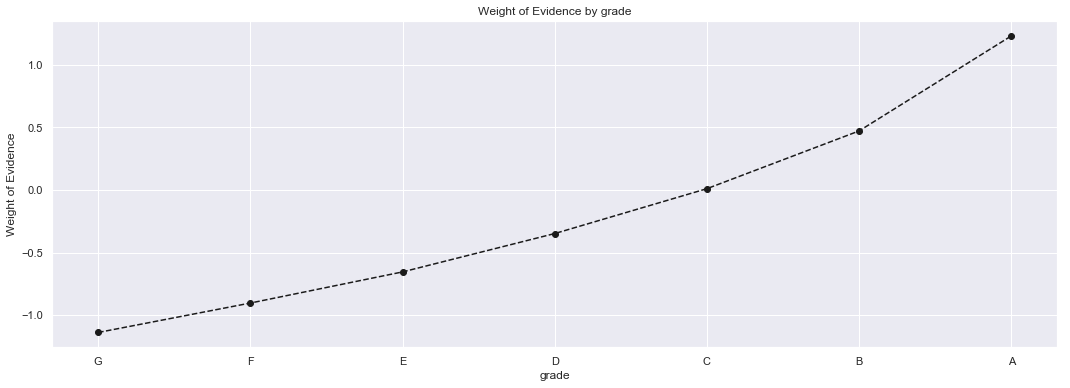

In [43]:
plot_by_woe(df_grade)

we can see from the above graph that the grades have significantly different woe as we  grade changes. We will therefore keep each grade as a feature.

In [44]:
#analyzing home ownership variable

df_home = woe_categorical(X, 'home_ownership', y)
df_home

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,31,0.838710,0.000171,26.0,5.0,0.000159,0.000281,-0.569820,NaN,NaN,inf
1,RENT,66257,0.886563,0.364679,58741.0,7516.0,0.358478,0.421679,-0.162375,0.047853,0.407445,inf
2,OWN,15747,0.902267,0.086672,14208.0,1539.0,0.086707,0.086344,0.004194,0.015704,0.166568,inf
3,OTHER,21,0.904762,0.000116,19.0,2.0,0.000116,0.000112,0.032813,0.002495,0.028619,inf
4,MORTGAGE,99629,0.912054,0.548358,90867.0,8762.0,0.554534,0.491584,0.120494,0.007292,0.087681,inf
5,ANY,1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.087946,inf,inf


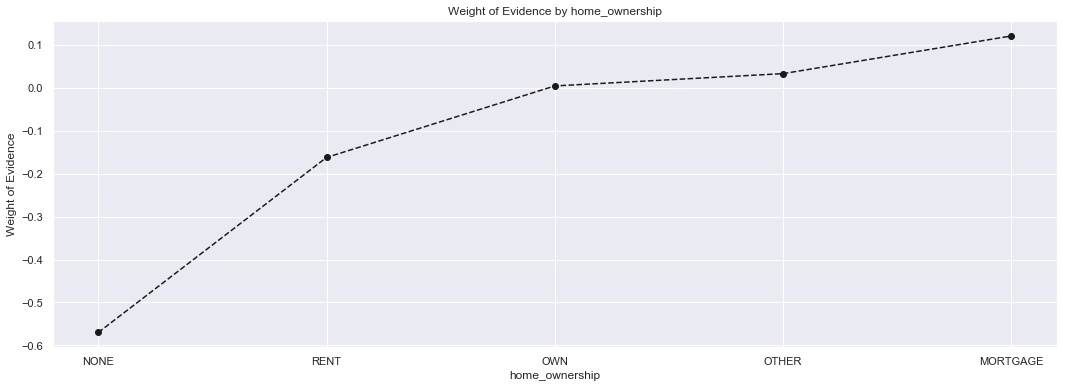

In [45]:
#ploting woe
plot_by_woe(df_home)

OTHER, NONE and ANY have very few observations and should be combined with the category with high risk of default that is RENT

In [46]:
#Analyzing verification status

veri_df = woe_categorical(X, 'verification_status', y)
veri_df

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,60766,0.882089,0.334456,53601.0,7165.0,0.327111,0.401986,-0.206119,NaN,NaN,0.033377
1,Source Verified,64050,0.902826,0.352531,57826.0,6224.0,0.352895,0.349192,0.010547,0.020737,0.216666,0.033377
2,Not Verified,56870,0.922015,0.313013,52435.0,4435.0,0.319995,0.248822,0.251568,0.019189,0.241021,0.033377


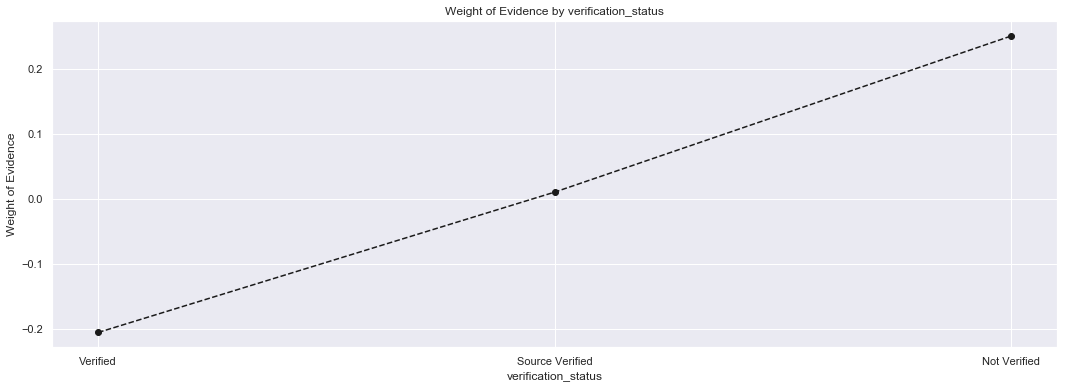

In [47]:
plot_by_woe(veri_df)

This variable has different WOE values and can be used as seperate variables

In [48]:
#analyzing purpose  variable
pur_df = woe_categorical(X, 'purpose', y)
pur_df

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,2052,0.819688,0.011294,1682.0,370.0,0.010265,0.020759,-0.704243,NaN,NaN,0.028333
1,moving,976,0.851434,0.005372,831.0,145.0,0.005071,0.008135,-0.472583,0.031746,0.231660,0.028333
2,wedding,411,0.851582,0.002262,350.0,61.0,0.002136,0.003422,-0.471419,0.000147,0.001163,0.028333
3,renewable_energy,105,0.866667,0.000578,91.0,14.0,0.000555,0.000785,-0.346677,0.015085,0.124743,0.028333
4,house,769,0.875163,0.004233,673.0,96.0,0.004107,0.005386,-0.271082,0.008496,0.075595,0.028333
5,medical,1690,0.882249,0.009302,1491.0,199.0,0.009099,0.011165,-0.204581,0.007086,0.066500,0.028333
6,other,8328,0.888689,0.045837,7401.0,927.0,0.045166,0.052009,-0.141062,0.006440,0.063519,0.028333
7,debt_consolidation,112109,0.896841,0.617048,100544.0,11565.0,0.613589,0.648844,-0.055867,0.008153,0.085195,0.028333
8,home_improvement,11143,0.908104,0.061331,10119.0,1024.0,0.061753,0.057451,0.072220,0.011262,0.128086,0.028333
9,major_purchase,2991,0.912738,0.016462,2730.0,261.0,0.016660,0.014643,0.129058,0.004634,0.056838,0.028333


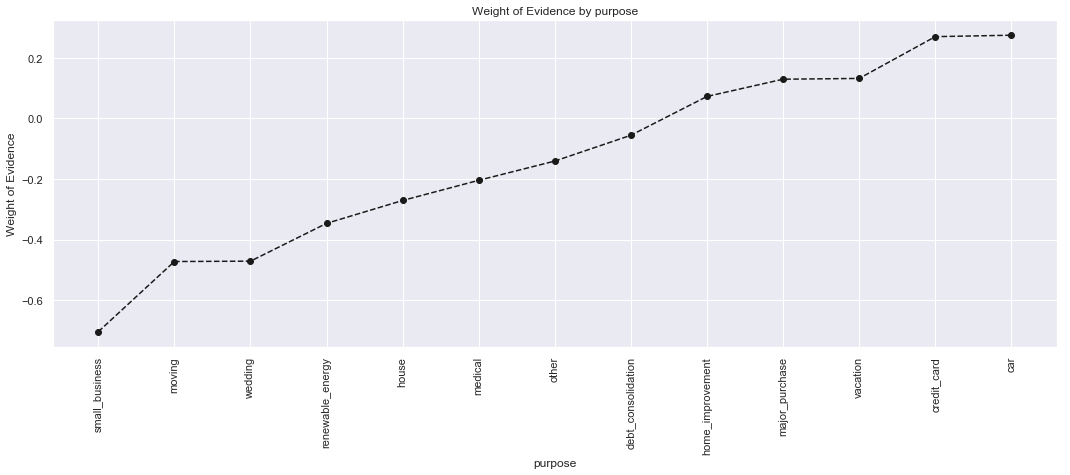

In [49]:
plot_by_woe(pur_df, 90)

The following  categories wil be combined together:
1. educational, renewable_energy, moving
2. other,house, medical
3. weeding, vacation
4. debt_consolidation
5. home_improvement, major purchase
6. car, credit_card


In [50]:
# analyzing by addr_state

addr_df = woe_categorical(X, 'addr_state', y)
addr_df

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,HI,1081,0.870490,0.005950,941.0,140.0,0.005743,0.007855,-0.313178,NaN,NaN,inf
1,NV,2560,0.888672,0.014090,2275.0,285.0,0.013884,0.015990,-0.141233,0.018182,0.171945,inf
2,AL,2360,0.889407,0.012989,2099.0,261.0,0.012810,0.014643,-0.133783,0.000735,0.007450,inf
3,OK,1534,0.890482,0.008443,1366.0,168.0,0.008336,0.009425,-0.122801,0.001076,0.010982,inf
4,VA,5737,0.890535,0.031576,5109.0,628.0,0.031179,0.035233,-0.122260,0.000053,0.000541,inf
5,LA,2152,0.891264,0.011845,1918.0,234.0,0.011705,0.013128,-0.114762,0.000729,0.007498,inf
6,NC,4933,0.892155,0.027151,4401.0,532.0,0.026858,0.029847,-0.105535,0.000891,0.009226,inf
7,DE,501,0.892216,0.002758,447.0,54.0,0.002728,0.003030,-0.104904,0.000061,0.000631,inf
8,NY,14924,0.893058,0.082142,13328.0,1596.0,0.081337,0.089542,-0.096112,0.000843,0.008792,inf
9,FL,11968,0.893800,0.065872,10697.0,1271.0,0.065281,0.071308,-0.088319,0.000742,0.007793,inf


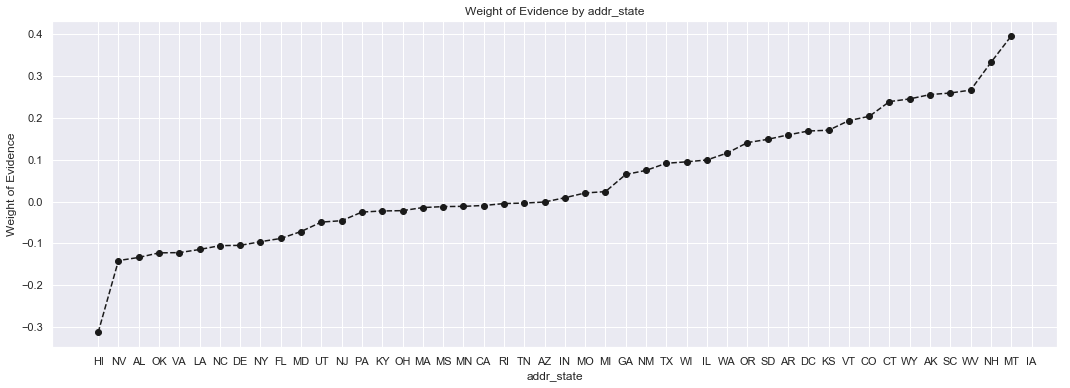

In [51]:
plot_by_woe(addr_df)

The states NE, IA, ME and ID have low observations and this may be the reason for their extreme woe. We will plot the graph again without including these categories and see if there is any changes.

In [52]:
#dataframe excluding low observations for addr_state column
data1 =addr_df.iloc[2:44, :]
data2 =addr_df.iloc[45:49, :]
low_data_woe = pd.concat([data1, data2], axis=0)

In [53]:
low_data_woe

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
2,AL,2360,0.889407,0.012989,2099.0,261.0,0.012810,0.014643,-0.133783,0.000735,0.007450,inf
3,OK,1534,0.890482,0.008443,1366.0,168.0,0.008336,0.009425,-0.122801,0.001076,0.010982,inf
4,VA,5737,0.890535,0.031576,5109.0,628.0,0.031179,0.035233,-0.122260,0.000053,0.000541,inf
5,LA,2152,0.891264,0.011845,1918.0,234.0,0.011705,0.013128,-0.114762,0.000729,0.007498,inf
6,NC,4933,0.892155,0.027151,4401.0,532.0,0.026858,0.029847,-0.105535,0.000891,0.009226,inf
7,DE,501,0.892216,0.002758,447.0,54.0,0.002728,0.003030,-0.104904,0.000061,0.000631,inf
8,NY,14924,0.893058,0.082142,13328.0,1596.0,0.081337,0.089542,-0.096112,0.000843,0.008792,inf
9,FL,11968,0.893800,0.065872,10697.0,1271.0,0.065281,0.071308,-0.088319,0.000742,0.007793,inf
10,MD,4568,0.895359,0.025142,4090.0,478.0,0.024960,0.026818,-0.071789,0.001559,0.016530,inf
11,UT,1336,0.897455,0.007353,1199.0,137.0,0.007317,0.007686,-0.049217,0.002096,0.022573,inf


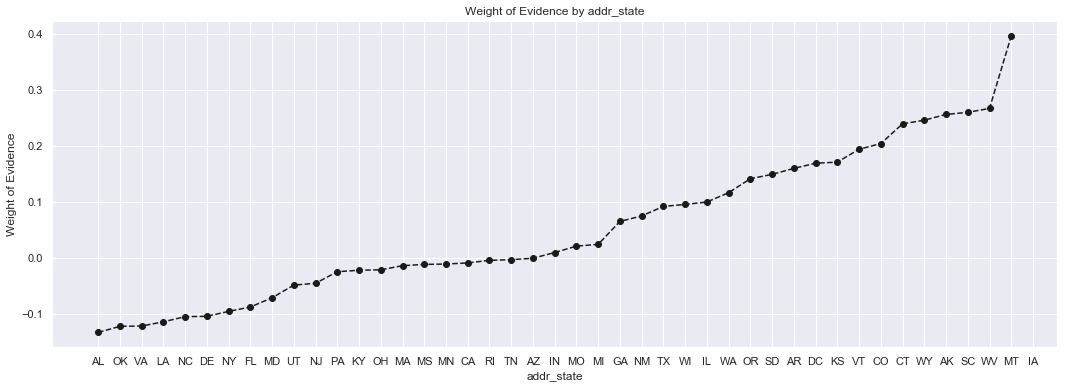

In [54]:
#ploting addr_state excluding states with low observations
plot_by_woe(low_data_woe)

In deciding which categories to  combine we use both WOE and the number of observations in our analysis. Categories with similar WOE but significantly different observations with not be combine together. The reason been that the number of observations could influence the WOE values. Also, categories with both similar WOE and observations greater than 5% can be combined together to form a new category. This  process will be used for  the rest of analysis.The categories to be combined as follows:

1. NE, IA, NV, HI, FL, AL
2. NY
3. LA, NM, OK, NC, MO, MD, NJ, VA
4. CA
5. AZ, MI, UT, TN, AR, PA
6. RI, OH, KY, DE, MN, SD, MA, IN
7. GA, WA
8. WI, OR
9. TX
10. IL, CT,MT
11. CO, SC
12. KS, VT, AK, MS
13. NH, WV, WY, DC

In total we wil have to create 13 categories for the addr_variable. Creating of these variables will be later. Lets move on to analyze the rest of the features.





In [55]:
# analyzing initial_list_status 

init_list_df = woe_categorical( X, 'initial_list_status', y)
init_list_df

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,106064,0.893951,0.583776,94816.0,11248.0,0.578633,0.631059,-0.086731,NaN,NaN,0.011513
1,w,75622,0.913041,0.416224,69046.0,6576.0,0.421367,0.368941,0.132868,0.01909,0.219598,0.011513


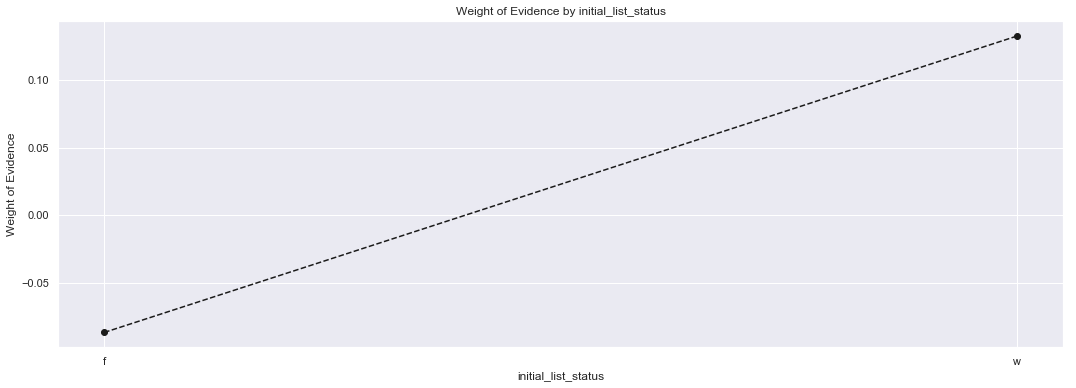

In [56]:
plot_by_woe(init_list_df)

This variable has significantly different WOE values and categories should be kept as seperate variables

## Analyzing Continous Variables

In [57]:
# function to callculate woe for continous variables
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE'])
#     df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


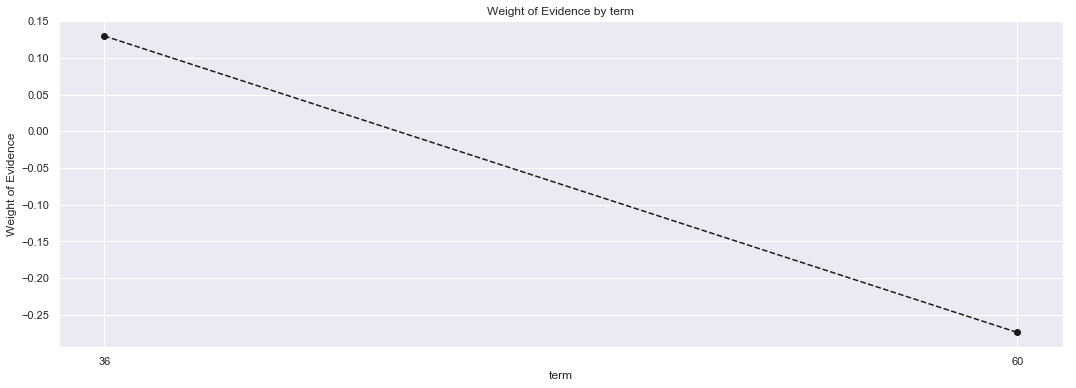

In [58]:
#analyzing term variable
plot_by_woe(woe_continous(X,'term', y ))

In [59]:
#check number of unique values
X['mths_since_issue_d'].unique()

array([80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79.])

In [60]:
# fine classing by creating  a new variable

X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)


In [61]:
 mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
mths_since_iss_df

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(67.972, 70.8]",36486,0.938141,0.200819,34229.0,2257.0,0.208889,0.126627,0.500558,NaN,NaN,0.087677
1,"(70.8, 73.6]",28044,0.917273,0.154354,25724.0,2320.0,0.156986,0.130162,0.187378,0.020868,0.313180,0.087677
2,"(73.6, 76.4]",26305,0.908002,0.144783,23885.0,2420.0,0.145763,0.135772,0.071004,0.009271,0.116374,0.087677
3,"(76.4, 79.2]",22738,0.900035,0.125150,20465.0,2273.0,0.124892,0.127525,-0.020863,0.007967,0.091868,0.087677
4,"(79.2, 82.0]",19484,0.892425,0.107240,17388.0,2096.0,0.106114,0.117594,-0.102729,0.007611,0.081866,0.087677
5,"(82.0, 84.8]",10753,0.885427,0.059185,9521.0,1232.0,0.058104,0.069120,-0.173618,0.006997,0.070889,0.087677
6,"(84.8, 87.6]",13611,0.867901,0.074915,11813.0,1798.0,0.072091,0.100875,-0.335953,0.017526,0.162335,0.087677
7,"(87.6, 90.4]",9304,0.868121,0.051209,8077.0,1227.0,0.049291,0.068840,-0.334030,0.000220,0.001923,0.087677
8,"(90.4, 93.2]",10186,0.858237,0.056064,8742.0,1444.0,0.053350,0.081014,-0.417757,0.009884,0.083726,0.087677
9,"(93.2, 96.0]",4775,0.841466,0.026282,4018.0,757.0,0.024521,0.042471,-0.549302,0.016771,0.131546,0.087677


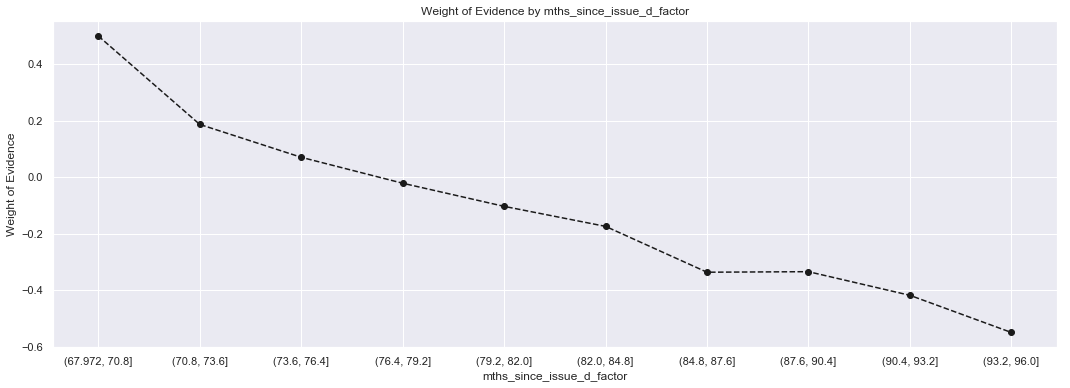

In [62]:
plot_by_woe(mths_since_iss_df)

The follwing categories will be created based on their WOE and number of observations
1. (67.97, 70.8)
2. (70.8, 73.6)
3. (73.6- 76.4)
4. (76.4.- 79.2)
5. (79.2-82)
6. 82-84
7. 84-90.4
8. 90.4-96

In [63]:
#Analyzing intrest rate
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)

In [64]:
int_rate_df = woe_continous(X, 'int_rate_factor',y)
int_rate_df

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.98, 8.006]",12809,0.973456,0.070501,12469.0,340.0,0.076095,0.019075,1.383576,NaN,NaN,0.334023
1,"(8.006, 10.012]",14732,0.960426,0.081085,14149.0,583.0,0.086347,0.032709,0.970733,0.013030,0.412843,0.334023
2,"(10.012, 12.018]",25553,0.946503,0.140644,24186.0,1367.0,0.147600,0.076694,0.654677,0.013923,0.316057,0.334023
3,"(12.018, 14.024]",35241,0.923527,0.193967,32546.0,2695.0,0.198618,0.151201,0.272778,0.022977,0.381899,0.334023
4,"(14.024, 16.03]",34858,0.898158,0.191858,31308.0,3550.0,0.191063,0.199170,-0.041553,0.025368,0.314330,0.334023
5,"(16.03, 18.036]",22550,0.870022,0.124115,19619.0,2931.0,0.119729,0.164441,-0.317324,0.028136,0.275771,0.334023
6,"(18.036, 20.042]",17227,0.848203,0.094817,14612.0,2615.0,0.089173,0.146712,-0.497900,0.021819,0.180576,0.334023
7,"(20.042, 22.048]",8586,0.818891,0.047257,7031.0,1555.0,0.042908,0.087242,-0.709625,0.029312,0.211726,0.334023
8,"(22.048, 24.054]",5658,0.787204,0.031142,4454.0,1204.0,0.027181,0.067549,-0.910326,0.031687,0.200700,0.334023
9,"(24.054, 26.06]",4472,0.779964,0.024614,3488.0,984.0,0.021286,0.055206,-0.953021,0.007240,0.042695,0.334023


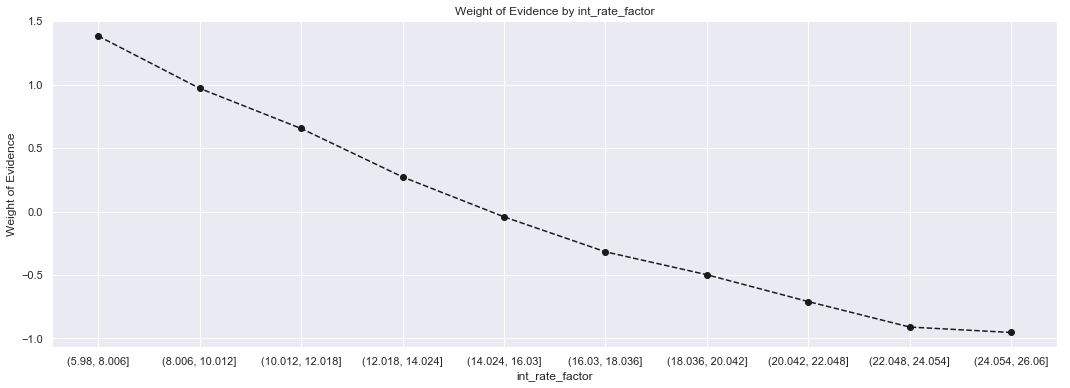

In [65]:
plot_by_woe(int_rate_df)

From the graph above only the last two categories will be combined.
1. (22.048, 26) 

In [72]:
#Analyzing tot_rec_int
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
rec_int_df = woe_continous(X, 'total_rec_int_factor', y)
rec_int_df

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-21.84, 1092.0]",48597,0.891495,0.267478,43324.0,5273.0,0.264393,0.295837,-0.112371,NaN,NaN,inf
1,"(1092.0, 2184.0]",52867,0.903834,0.290980,47783.0,5084.0,0.291605,0.285233,0.022093,0.012339,0.134464,inf
2,"(2184.0, 3276.0]",31823,0.906891,0.175154,28860.0,2963.0,0.176124,0.166237,0.057776,0.003057,0.035683,inf
3,"(3276.0, 4368.0]",16953,0.902554,0.093309,15301.0,1652.0,0.093377,0.092684,0.007453,0.004337,0.050323,inf
4,"(4368.0, 5460.0]",10593,0.909657,0.058304,9636.0,957.0,0.058806,0.053692,0.090979,0.007103,0.083526,inf
5,"(5460.0, 6552.0]",6923,0.903943,0.038104,6258.0,665.0,0.038191,0.037309,0.023350,0.005714,0.067629,inf
6,"(6552.0, 7644.0]",4601,0.909150,0.025324,4183.0,418.0,0.025528,0.023452,0.084824,0.005207,0.061474,inf
7,"(7644.0, 8736.0]",3110,0.905466,0.017117,2816.0,294.0,0.017185,0.016495,0.041014,0.003684,0.043810,inf
8,"(8736.0, 9828.0]",2113,0.909134,0.011630,1921.0,192.0,0.011723,0.010772,0.084627,0.003668,0.043613,inf
9,"(9828.0, 10920.0]",1414,0.917256,0.007783,1297.0,117.0,0.007915,0.006564,0.187157,0.008122,0.102529,inf


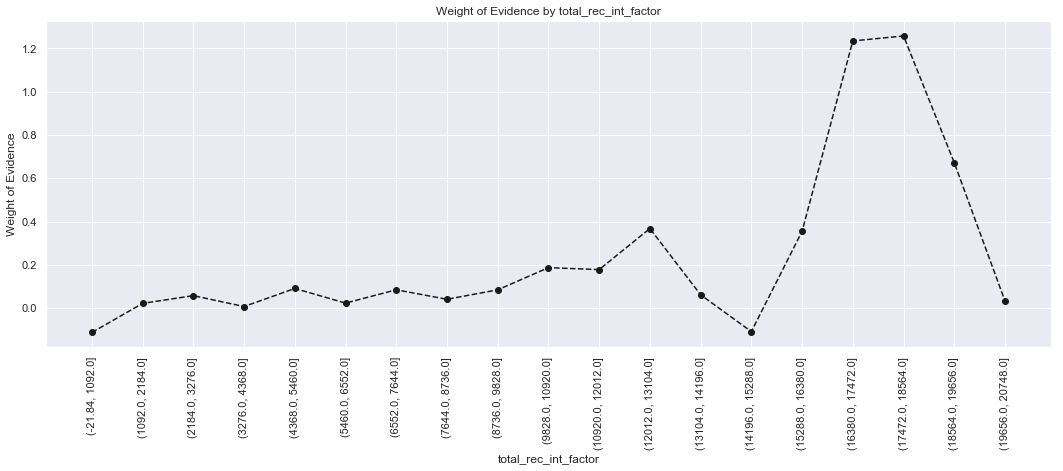

In [73]:
plot_by_woe(rec_int_df, 90)

In [74]:
#anlyzing total_revol_hi_lim
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
revol_hi_df = woe_continous(X, 'total_rev_hi_lim_factor', y)
revol_hi_df

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9899.899, 100098.99]",178475,0.901157,0.982327,160834.0,17641.0,0.981521,0.989733,-0.008332,NaN,NaN,inf
1,"(100098.99, 200097.98]",2708,0.942762,0.014905,2553.0,155.0,0.015580,0.008696,0.583121,0.041605,0.591452,inf
2,"(200097.98, 300096.97]",351,0.945869,0.001932,332.0,19.0,0.002026,0.001066,0.642217,0.003107,0.059097,inf
3,"(300096.97, 400095.96]",102,0.921569,0.000561,94.0,8.0,0.000574,0.000449,0.245374,0.024300,0.396843,inf
4,"(400095.96, 500094.95]",27,1.000000,0.000149,27.0,0.0,0.000165,0.000000,inf,0.078431,inf,inf
5,"(500094.95, 600093.94]",5,1.000000,0.000028,5.0,0.0,0.000031,0.000000,inf,0.000000,NaN,inf
6,"(600093.94, 700092.93]",7,0.857143,0.000039,6.0,1.0,0.000037,0.000056,-0.426719,0.142857,inf,inf
7,"(700092.93, 800091.92]",4,1.000000,0.000022,4.0,0.0,0.000024,0.000000,inf,0.142857,inf,inf
8,"(800091.92, 900090.91]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(900090.91, 1000089.9]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


In [75]:
#analyzing below 100000
#Analyzing income  below 150000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# fine-classing again
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.1, 10090.0]",32152,0.889307,0.180148,28593.0,3559.0,0.177780,0.201746,-0.126465,NaN,NaN,0.013952
1,"(10090.0, 20080.0]",55916,0.895361,0.313299,50065.0,5851.0,0.311284,0.331671,-0.063437,0.006054,0.063027,0.013952
2,"(20080.0, 30070.0]",37940,0.903031,0.212579,34261.0,3679.0,0.213021,0.208548,0.021220,0.007670,0.084657,0.013952
3,"(30070.0, 40060.0]",22348,0.904913,0.125216,20223.0,2125.0,0.125738,0.120458,0.042902,0.001882,0.021682,0.013952
4,"(40060.0, 50050.0]",13247,0.914924,0.074223,12120.0,1127.0,0.075357,0.063885,0.165151,0.010011,0.122249,0.013952
5,"(50050.0, 60040.0]",7296,0.915570,0.040880,6680.0,616.0,0.041534,0.034919,0.173479,0.000646,0.008329,0.013952
6,"(60040.0, 70030.0]",4381,0.926957,0.024547,4061.0,320.0,0.025250,0.018140,0.330716,0.011387,0.157237,0.013952
7,"(70030.0, 80020.0]",2534,0.922652,0.014198,2338.0,196.0,0.014537,0.011110,0.268789,0.004305,0.061927,0.013952
8,"(80020.0, 90010.0]",1630,0.933129,0.009133,1521.0,109.0,0.009457,0.006179,0.425628,0.010477,0.156839,0.013952
9,"(90010.0, 100000.0]",1031,0.942774,0.005777,972.0,59.0,0.006043,0.003344,0.591671,0.009645,0.166043,0.013952


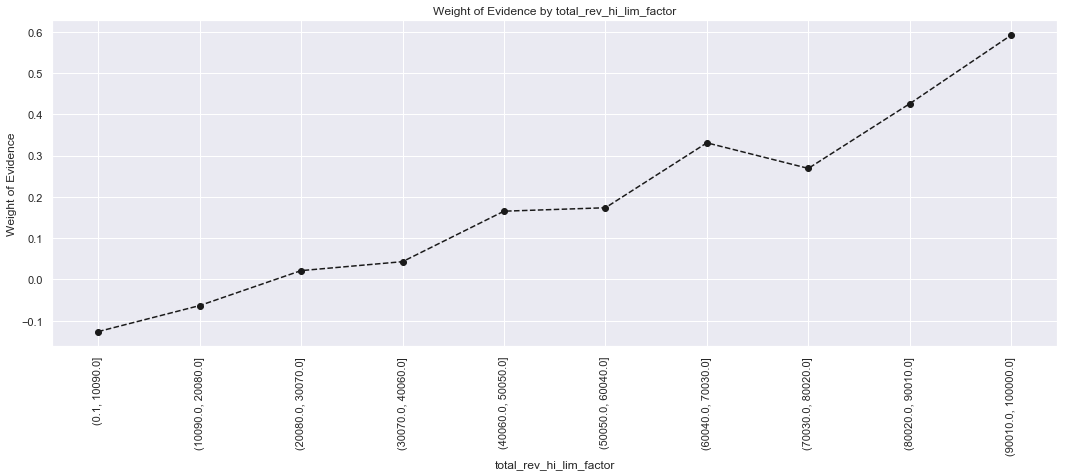

In [77]:
plot_by_woe(df_temp, 90)

In [79]:
#Analyzing total_pymnt
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
total_pym_df = woe_continous(X, 'total_pymnt_factor', y)
total_pym_df


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-20.362, 5640.912]",47686,0.816802,0.262464,38950.0,8736.0,0.237700,0.490126,-0.723652,NaN,NaN,inf
1,"(5640.912, 11246.134]",63792,0.906822,0.351111,57848.0,5944.0,0.353029,0.333483,0.056958,0.090021,0.780610,inf
2,"(11246.134, 16851.356]",35463,0.940614,0.195188,33357.0,2106.0,0.203568,0.118155,0.543998,0.033792,0.487041,inf
3,"(16851.356, 22456.578]",17528,0.959493,0.096474,16818.0,710.0,0.102635,0.039834,0.946461,0.018879,0.402463,inf
4,"(22456.578, 28061.8]",8868,0.974064,0.048809,8638.0,230.0,0.052715,0.012904,1.407368,0.014571,0.460907,inf
5,"(28061.8, 33667.022]",4154,0.985556,0.022864,4094.0,60.0,0.024984,0.003366,2.004454,0.011492,0.597086,inf
6,"(33667.022, 39272.244]",2412,0.989221,0.013276,2386.0,26.0,0.014561,0.001459,2.300798,0.003664,0.296344,inf
7,"(39272.244, 44877.466]",1434,0.991632,0.007893,1422.0,12.0,0.008678,0.000673,2.556434,0.002411,0.255636,inf
8,"(44877.466, 50482.688]",297,1.000000,0.001635,297.0,0.0,0.001813,0.000000,inf,0.008368,inf,inf
9,"(50482.688, 56087.91]",52,1.000000,0.000286,52.0,0.0,0.000317,0.000000,inf,0.000000,NaN,inf


In [80]:
# analyzing dti 
X['dti_factor'] = pd.cut(X['dti'], 10)
dti_df = woe_continous(X, 'dti_factor', y)
dti_df

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 3.999]",5131,0.929059,0.028241,4767.0,364.0,0.029092,0.020422,0.353840,NaN,NaN,0.039625
1,"(3.999, 7.998]",16275,0.924178,0.089578,15041.0,1234.0,0.091791,0.069232,0.282040,0.004880,0.071800,0.039625
2,"(7.998, 11.997]",27692,0.920591,0.152417,25493.0,2199.0,0.155576,0.123373,0.231922,0.003587,0.050118,0.039625
3,"(11.997, 15.996]",34055,0.912553,0.187439,31077.0,2978.0,0.189653,0.167078,0.126737,0.008038,0.105185,0.039625
4,"(15.996, 19.995]",32736,0.899927,0.180179,29460.0,3276.0,0.179785,0.183797,-0.022069,0.012627,0.148806,0.039625
5,"(19.995, 23.994]",27113,0.891602,0.149230,24174.0,2939.0,0.147527,0.164890,-0.111270,0.008325,0.089202,0.039625
6,"(23.994, 27.993]",19736,0.877736,0.108627,17323.0,2413.0,0.105717,0.135379,-0.247314,0.013866,0.136044,0.039625
7,"(27.993, 31.992]",12176,0.870647,0.067017,10601.0,1575.0,0.064695,0.088364,-0.311786,0.007089,0.064471,0.039625
8,"(31.992, 35.991]",5602,0.873260,0.030833,4892.0,710.0,0.029854,0.039834,-0.288387,0.002612,0.023398,0.039625
9,"(35.991, 39.99]",1170,0.883761,0.006440,1034.0,136.0,0.006310,0.007630,-0.189944,0.010501,0.098444,0.039625


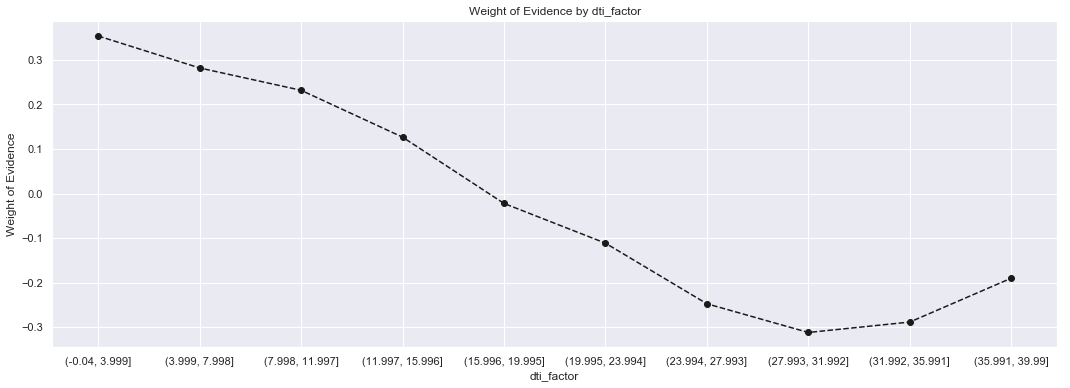

In [81]:
plot_by_woe(dti_df)

The following categories will  be combined:
1. (27.993, 31.992), (31.992, 35.991), (35.991, 39.99)

In [82]:
#Analyzing annual income
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
ann_inc_df


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3496.0, 153920.0]",172204,0.900415,0.947811,155055.0,17149.0,0.946254,0.962130,-0.016639,NaN,NaN,inf
1,"(153920.0, 303840.0]",8507,0.927236,0.046823,7888.0,619.0,0.048138,0.034728,0.326514,0.026822,0.343153,inf
2,"(303840.0, 453760.0]",676,0.936391,0.003721,633.0,43.0,0.003863,0.002412,0.470792,0.009154,0.144278,inf
3,"(453760.0, 603680.0]",177,0.966102,0.000974,171.0,6.0,0.001044,0.000337,1.131425,0.029711,0.660634,inf
4,"(603680.0, 753600.0]",44,0.931818,0.000242,41.0,3.0,0.000250,0.000168,0.396481,0.034284,0.734944,inf
5,"(753600.0, 903520.0]",34,0.911765,0.000187,31.0,3.0,0.000189,0.000168,0.116896,0.020053,0.279585,inf
6,"(903520.0, 1053440.0]",21,0.952381,0.000116,20.0,1.0,0.000122,0.000056,0.777254,0.040616,0.660357,inf
7,"(1053440.0, 1203360.0]",9,1.000000,0.000050,9.0,0.0,0.000055,0.000000,inf,0.047619,inf,inf
8,"(1203360.0, 1353280.0]",4,1.000000,0.000022,4.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
9,"(1353280.0, 1503200.0]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


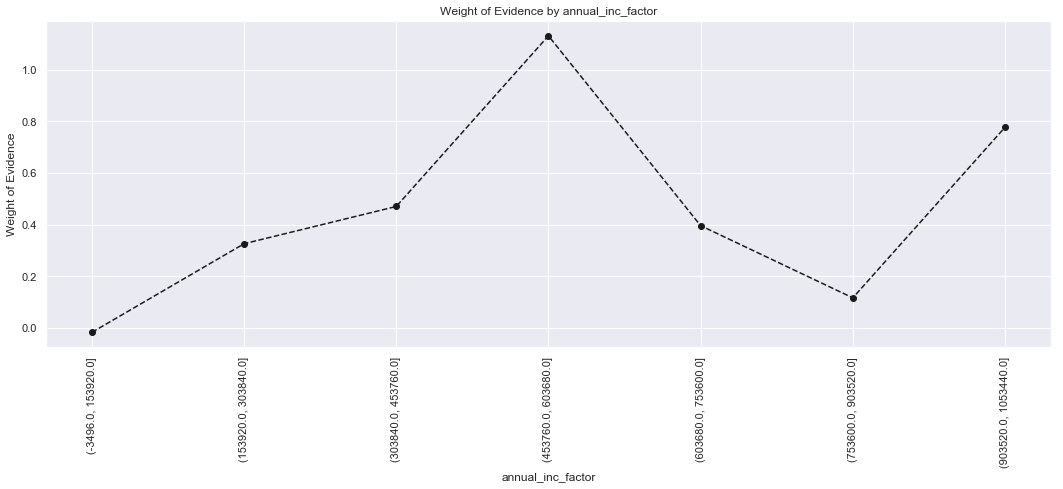

In [83]:
plot_by_woe(ann_inc_df, 90)

we will seperate this variable into people with higher and lower income. From the WOE table we see that as annual income increases the the number o observations decreases, this is because only  a few people earn a high income. We will a new variable for people with income above 150000 dollars.. And also, analyze individuals with income  below 150000 dollars.

In [84]:
#Analyzing income  below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3854.0, 18600.0]",498,0.881526,0.002896,439.0,59.0,0.002835,0.003444,-0.194476,NaN,NaN,0.032662
1,"(18600.0, 33200.0]",10295,0.874794,0.059868,9006.0,1289.0,0.058167,0.075244,-0.257414,0.006733,0.062938,0.032662
2,"(33200.0, 47800.0]",29058,0.882545,0.168980,25645.0,3413.0,0.165633,0.199229,-0.184681,0.007752,0.072733,0.032662
3,"(47800.0, 62400.0]",38948,0.890290,0.226493,34675.0,4273.0,0.223955,0.249431,-0.107735,0.007744,0.076946,0.032662
4,"(62400.0, 77000.0]",31578,0.902052,0.183635,28485.0,3093.0,0.183976,0.180550,0.018798,0.011762,0.126533,0.032662
5,"(77000.0, 91600.0]",23491,0.913243,0.136607,21453.0,2038.0,0.138558,0.118966,0.152458,0.011191,0.133659,0.032662
6,"(91600.0, 106200.0]",16338,0.916330,0.095010,14971.0,1367.0,0.096693,0.079797,0.192058,0.003087,0.039601,0.032662
7,"(106200.0, 120800.0]",10676,0.923942,0.062084,9864.0,812.0,0.063709,0.047399,0.295709,0.007612,0.103650,0.032662
8,"(120800.0, 135400.0]",6126,0.934541,0.035624,5725.0,401.0,0.036976,0.023408,0.457198,0.010600,0.161490,0.032662
9,"(135400.0, 150000.0]",4953,0.922067,0.028803,4567.0,386.0,0.029497,0.022532,0.269336,0.012474,0.187862,0.032662


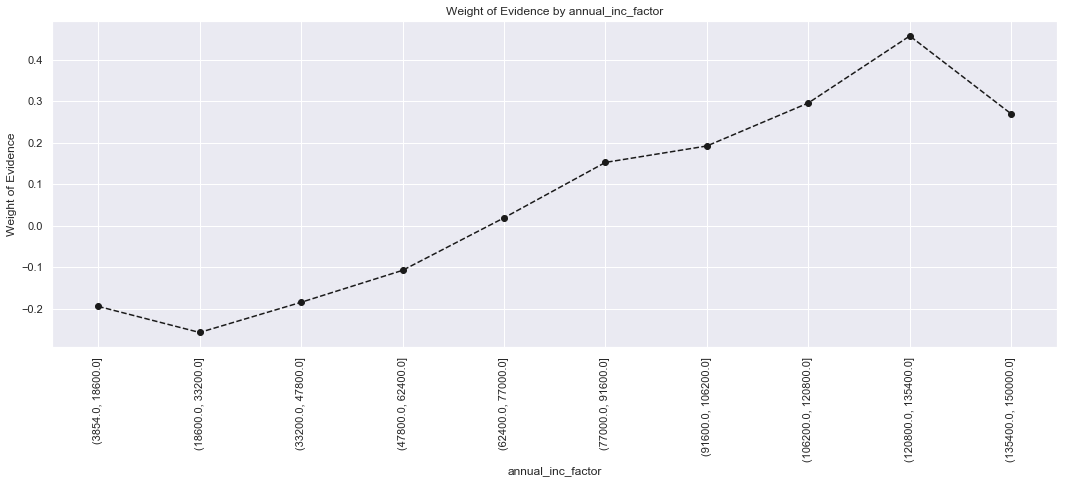

In [85]:
plot_by_woe(df_temp, 90)

from the graph we will combine the follwing categories based on WOE and number of observations as follows: 
 (<=32000), (>32000 <= 50000), (>50000 <= 60000), (>60000 <=75000), (>75000 <=90000), (>90000 <=120000), (>120000 <=135000), (>135000 <=150000), (>150000)



In [86]:
#analyzing inq_last_6mths
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
inq_fact_df = woe_continous(X, 'inq_last_6mths_factor', y)
inq_fact_df

,inq_last_6mths_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.007, 1.0]",143652,0.909671,0.790661,130676.0,12976.0,0.797476,0.728007,0.091141,NaN,NaN,inf
1,"(1.0, 2.0]",23520,0.880145,0.129454,20701.0,2819.0,0.126332,0.158158,-0.224679,0.029526,0.315820,inf
2,"(2.0, 3.0]",9932,0.860451,0.054666,8546.0,1386.0,0.052154,0.077760,-0.399437,0.019693,0.174758,inf
3,"(3.0, 4.0]",3107,0.855809,0.017101,2659.0,448.0,0.016227,0.025135,-0.437567,0.004642,0.038129,inf
4,"(4.0, 5.0]",1078,0.882189,0.005933,951.0,127.0,0.005804,0.007125,-0.205152,0.026380,0.232415,inf
5,"(5.0, 6.0]",396,0.828283,0.002180,328.0,68.0,0.002002,0.003815,-0.644973,0.053906,0.439821,inf
6,"(6.0, 7.0]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.171717,inf,inf


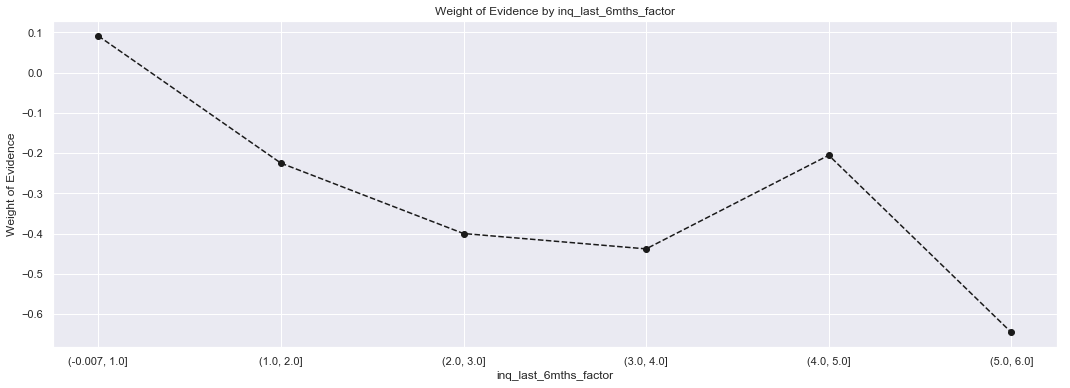

In [87]:
plot_by_woe(inq_fact_df)

The follwing categories will be created
1. <1 months
2. 1-2
3. 2-4
4. 4-7

In [88]:
# analyzing total current balance
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
curr_bal_df = woe_continous(X, 'tot_cur_bal_factor', y)
curr_bal_df

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8000.078, 400003.9]",169250,0.899592,0.931552,152256.0,16994.0,0.929172,0.953434,-0.025776,NaN,NaN,inf
1,"(400003.9, 800007.8]",11512,0.932853,0.063362,10739.0,773.0,0.065537,0.043368,0.412879,0.033260,0.438655,inf
2,"(800007.8, 1200011.7]",731,0.935705,0.004023,684.0,47.0,0.004174,0.002637,0.459332,0.002852,0.046452,inf
3,"(1200011.7, 1600015.6]",126,0.968254,0.000694,122.0,4.0,0.000745,0.000224,1.199248,0.032549,0.739916,inf
4,"(1600015.6, 2000019.5]",33,0.848485,0.000182,28.0,5.0,0.000171,0.000281,-0.495712,0.119769,1.694960,inf
5,"(2000019.5, 2400023.4]",16,0.937500,0.000088,15.0,1.0,0.000092,0.000056,0.489571,0.089015,0.985284,inf
6,"(2400023.4, 2800027.3]",8,1.000000,0.000044,8.0,0.0,0.000049,0.000000,inf,0.062500,inf,inf
7,"(2800027.3, 3200031.2]",2,1.000000,0.000011,2.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
8,"(3200031.2, 3600035.1]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(3600035.1, 4000039.0]",4,1.000000,0.000022,4.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


In [89]:
#Analyzing current balance  below 
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# fine-classing again
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-399.999, 39999.9]",55529,0.893929,0.328091,49639.0,5890.0,0.326025,0.346593,-0.061176,NaN,NaN,0.01394
1,"(39999.9, 79999.8]",28089,0.887073,0.165963,24917.0,3172.0,0.163653,0.186654,-0.131508,0.006856,0.070333,0.01394
2,"(79999.8, 119999.7]",14663,0.896815,0.086636,13150.0,1513.0,0.086368,0.089031,-0.030369,0.009742,0.101139,0.01394
3,"(119999.7, 159999.6]",14742,0.899674,0.087102,13263.0,1479.0,0.087110,0.087031,0.000916,0.002859,0.031285,0.01394
4,"(159999.6, 199999.5]",14896,0.903531,0.088012,13459.0,1437.0,0.088398,0.084559,0.044394,0.003857,0.043478,0.01394
5,"(199999.5, 239999.4]",12642,0.907610,0.074695,11474.0,1168.0,0.075360,0.068730,0.092094,0.004078,0.047700,0.01394
6,"(239999.4, 279999.3]",10255,0.916919,0.060591,9403.0,852.0,0.061758,0.050135,0.208501,0.009309,0.116407,0.01394
7,"(279999.3, 319999.2]",8030,0.913948,0.047445,7339.0,691.0,0.048202,0.040661,0.170122,0.002971,0.038379,0.01394
8,"(319999.2, 359999.1]",5931,0.926151,0.035043,5493.0,438.0,0.036078,0.025774,0.336315,0.012203,0.166193,0.01394
9,"(359999.1, 399999.0]",4472,0.920841,0.026423,4118.0,354.0,0.027047,0.020831,0.261130,0.005310,0.075185,0.01394


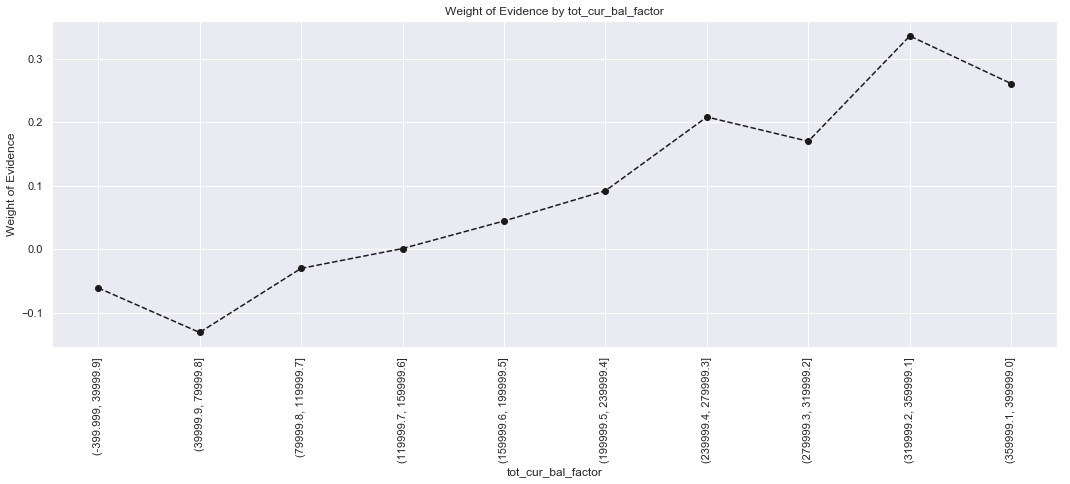

In [90]:
plot_by_woe(df_temp, 90)

the variables will be created: 
<40000
40000-80000
80000-120000
120000-160000
160000-200000
200000-240000
240000-320000
320000-400000

In [91]:
# analyzing mths_since_credit_pull 
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
mths_cr_pull_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
mths_cr_pull_df

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.96, 59.0]",156536,0.924810,0.861574,144766.0,11770.0,0.883463,0.660346,0.291086,NaN,NaN,0.313463
1,"(59.0, 63.0]",8447,0.798153,0.046492,6742.0,1705.0,0.041144,0.095658,-0.843687,0.126656,1.134773,0.313463
2,"(63.0, 67.0]",6806,0.748163,0.037460,5092.0,1714.0,0.031075,0.096162,-1.129638,0.049990,0.285951,0.313463
3,"(67.0, 71.0]",3942,0.714612,0.021697,2817.0,1125.0,0.017191,0.063117,-1.300589,0.033552,0.170951,0.313463
4,"(71.0, 75.0]",2666,0.755064,0.014674,2013.0,653.0,0.012285,0.036636,-1.092674,0.040452,0.207915,0.313463
5,"(75.0, 79.0]",1737,0.707542,0.009560,1229.0,508.0,0.007500,0.028501,-1.335004,0.047522,0.242330,0.313463
6,"(79.0, 83.0]",868,0.720046,0.004777,625.0,243.0,0.003814,0.013633,-1.273789,0.012504,0.061216,0.313463
7,"(83.0, 87.0]",461,0.811280,0.002537,374.0,87.0,0.002282,0.004881,-0.760131,0.091234,0.513657,0.313463
8,"(87.0, 91.0]",193,0.906736,0.001062,175.0,18.0,0.001068,0.001010,0.055935,0.095456,0.816067,0.313463
9,"(91.0, 95.0]",30,0.966667,0.000165,29.0,1.0,0.000177,0.000056,1.148817,0.059931,1.092882,0.313463


In [92]:
#Analyzing mths_since_credit_pull  below 60
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 60].copy()
# fine-classing again
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y[X_train_prepr_temp.index])
df_temp

,mths_since_last_credit_pull_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.995, 56.0]",147534,0.923638,0.929102,136268.0,11266.0,0.929592,0.923216,0.006883,NaN,NaN,0.111477
1,"(56.0, 57.0]",3189,0.991847,0.020083,3163.0,26.0,0.021577,0.002131,2.315229,0.068209,2.308345,0.111477
2,"(57.0, 58.0]",2910,0.985567,0.018326,2868.0,42.0,0.019565,0.003442,1.737750,0.006280,0.577479,0.111477
3,"(58.0, 59.0]",2903,0.849811,0.018282,2467.0,436.0,0.016829,0.035729,-0.752835,0.135756,2.490585,0.111477
4,"(59.0, 60.0]",2256,0.808067,0.014207,1823.0,433.0,0.012436,0.035483,-1.048450,0.041743,0.295615,0.111477


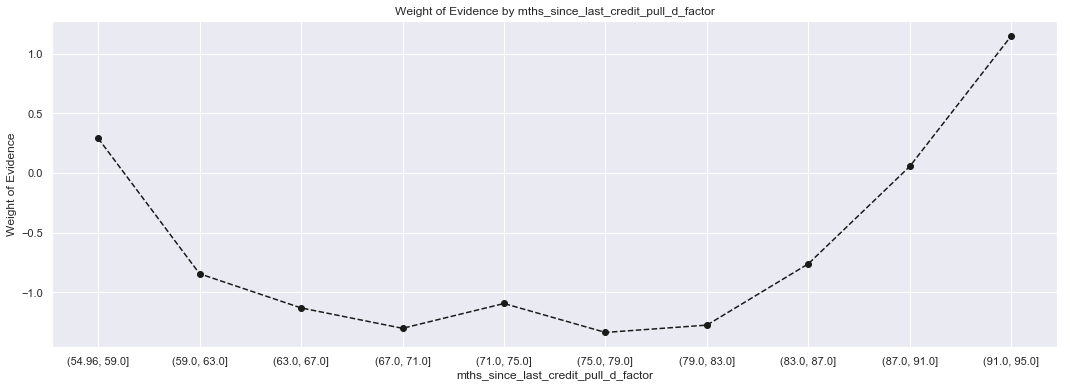

In [93]:
plot_by_woe(mths_cr_pull_df)

The following categories will be group together: 54-65, 65-76, greater than 76

In [94]:
# analyzing out_prncp 
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
out_df = woe_continous(X, 'out_prncp_factor', y)
out_df

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-31.899, 3189.877]",96256,0.848072,0.529793,81632.0,14624.0,0.498175,0.820467,-0.498921,NaN,NaN,0.503777
1,"(3189.877, 6379.754]",25082,0.967945,0.138051,24278.0,804.0,0.148161,0.045108,1.189248,0.119873,1.688169,0.503777
2,"(6379.754, 9569.631]",18963,0.966197,0.104372,18322.0,641.0,0.111814,0.035963,1.134350,0.001748,0.054898,0.503777
3,"(9569.631, 12759.508]",15134,0.962997,0.083298,14574.0,560.0,0.088941,0.031418,1.040579,0.003200,0.093771,0.503777
4,"(12759.508, 15949.385]",9680,0.960434,0.053279,9297.0,383.0,0.056737,0.021488,0.970933,0.002563,0.069646,0.503777
5,"(15949.385, 19139.262]",6762,0.954451,0.037218,6454.0,308.0,0.039387,0.017280,0.823877,0.005983,0.147056,0.503777
6,"(19139.262, 22329.139]",4619,0.952804,0.025423,4401.0,218.0,0.026858,0.012231,0.786613,0.001648,0.037264,0.503777
7,"(22329.139, 25519.016]",2860,0.952448,0.015741,2724.0,136.0,0.016624,0.007630,0.778723,0.000356,0.007890,0.503777
8,"(25519.016, 28708.893]",1642,0.950061,0.009038,1560.0,82.0,0.009520,0.004601,0.727243,0.002387,0.051480,0.503777
9,"(28708.893, 31898.77]",688,0.901163,0.003787,620.0,68.0,0.003784,0.003815,-0.008267,0.048898,0.735510,0.503777


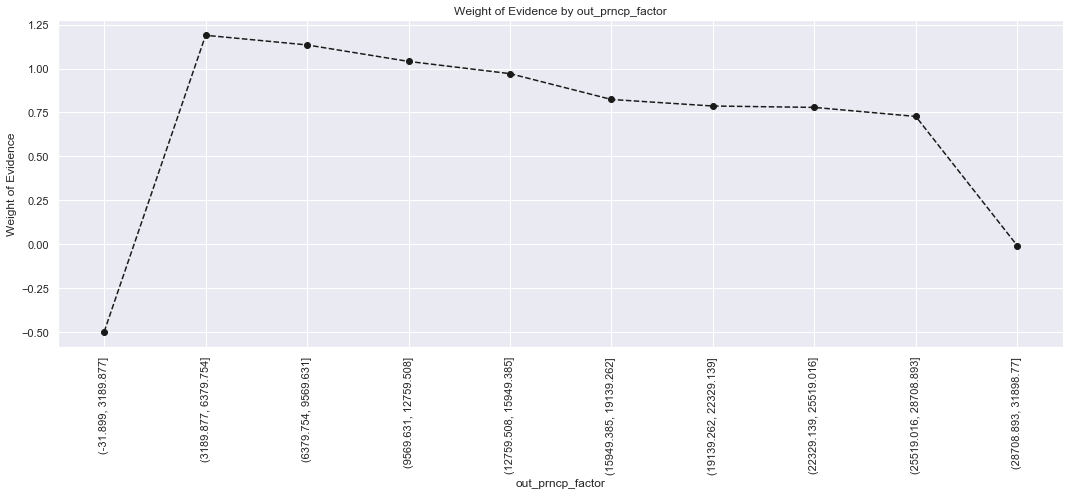

In [95]:
plot_by_woe(out_df, 90)

In [96]:
# analyzing mths_since_issue_date 
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
iss_df = woe_continous(X, 'mths_since_issue_d', y)
iss_df

,mths_since_issue_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(67.972, 70.8]",36486,0.938141,0.200819,34229.0,2257.0,0.208889,0.126627,0.500558,NaN,NaN,0.087677
1,"(70.8, 73.6]",28044,0.917273,0.154354,25724.0,2320.0,0.156986,0.130162,0.187378,0.020868,0.313180,0.087677
2,"(73.6, 76.4]",26305,0.908002,0.144783,23885.0,2420.0,0.145763,0.135772,0.071004,0.009271,0.116374,0.087677
3,"(76.4, 79.2]",22738,0.900035,0.125150,20465.0,2273.0,0.124892,0.127525,-0.020863,0.007967,0.091868,0.087677
4,"(79.2, 82.0]",19484,0.892425,0.107240,17388.0,2096.0,0.106114,0.117594,-0.102729,0.007611,0.081866,0.087677
5,"(82.0, 84.8]",10753,0.885427,0.059185,9521.0,1232.0,0.058104,0.069120,-0.173618,0.006997,0.070889,0.087677
6,"(84.8, 87.6]",13611,0.867901,0.074915,11813.0,1798.0,0.072091,0.100875,-0.335953,0.017526,0.162335,0.087677
7,"(87.6, 90.4]",9304,0.868121,0.051209,8077.0,1227.0,0.049291,0.068840,-0.334030,0.000220,0.001923,0.087677
8,"(90.4, 93.2]",10186,0.858237,0.056064,8742.0,1444.0,0.053350,0.081014,-0.417757,0.009884,0.083726,0.087677
9,"(93.2, 96.0]",4775,0.841466,0.026282,4018.0,757.0,0.024521,0.042471,-0.549302,0.016771,0.131546,0.087677


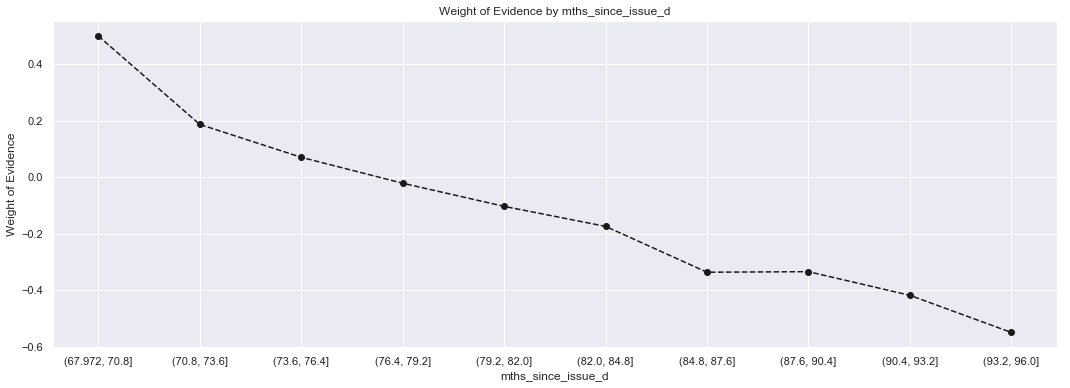

In [97]:
plot_by_woe(iss_df)

## Creating  new features based on WOE

In [98]:
# we will create a new dataframe and start with the grade variable

new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

In [99]:
#checking to see if it works
new_df.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
42537,1,0,0,0,0,0,0
42538,0,1,0,0,0,0,0
42539,1,0,0,0,0,0,0
42541,0,1,0,0,0,0,0
42543,0,1,0,0,0,0,0


In [103]:
# # home_ownership 

new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'], preprocess_data['home_ownership:NONE'],
                                                 preprocess_data['home_ownership:RENT'], preprocess_data['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

#verification status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])

new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


# addr state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                           preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],preprocess_data['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                     preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                  preprocess_data['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
 preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                    preprocess_data['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                           preprocess_data['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                           preprocess_data['addr_state:DC']])
#initial_list_status
new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term 
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

#total_rec_int 
new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


#total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


#total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
#int_Rate

new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


#dti 
new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

#annual income 
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

#inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

# #revol_util
# new_df['revol_util:<44'] = np.where((preprocess_data['revol_util'] <=44), 1,0)
# new_df['revol_util:44-89'] =np.where((preprocess_data['revol_util'] > 44) & (preprocess_data['revol_util'] <= 89),1, 0)
# new_df['revol_util:>89'] = np.where((preprocess_data['revol_util'] >89), 1,0)

#tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

#mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

#mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)



new_df['good_bad'] = preprocess_data.loc[:, 'good_bad']



In [104]:
#Displaying first 10 rows of new_df
pd.options.display.max_columns = None
new_df.head(10)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:MORTGAGE,verification_status:NOT_VERIFIED,verification_status:SOURCE_VERIFIED,verification_status:VERIFIED,purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING,purpose:OTHER_HOUSE_MEDICAL,purpose:WEDDING_VACATION,purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE,purpose:CAR_CREDIT_CARD,addr_state:NE_IA_NV_HI_FL_AL,addr_state:NY,addr_state:LA_NM_OK_NC_MO_MD_NJ_VA,addr_state:CA,addr_state:AZ_MI_UT_TN_AR_PA,addr_state:RI_OH_KY_DE_MN_SD_MA_IN,addr_state:GA_WA,addr_state:WI_OR,addr_state:TX,addr_state:IL_CT_MT,addr_state:CO_SC,addr_state:KS_VT_AK_NS,addr_state:NH_WV_WY_DC,initial_list_status:F,initial_list_status:W,term:36,term:60,total_rec_int:<1000,total_rec_int:1000-2000,total_rec_int:2000-9000,total_rec_int:>9000,total_rev_hi_lim:<10000,total_rev_hi_lim:10000-20000,total_rev_hi_lim:20000-40000,total_rev_hi_lim:40000-60000,total_rev_hi_lim:60000-80000,total_rev_hi_lim:80000-100000,total_rev_hi_lim:<100000,total_pymnt:<5000,total_pymnt:5000-11000,total_pymnt:11000-16000,total_pymnt:16000-22000,total_pymnt:>22000,int_rate:<7.484,int_rate:7.484-9.548,int_rate:9.548-11.612,int_rate:11.612-13.676,int_rate:13.676-15.74,int_rate:15.74-17.804,int_rate:17.804-19.868,int_rate:7.19.868-21.932,int_rate:21.932-26.06,dti:<4,dti:4-8,dti:8-12,dti:12-16,dti:16-20,dti:20-23,dti:23-27,dti:27-40,annual_inc:<32000,annual_inc:32000-50000,annual_inc:50000-60000,annual_inc:60000-75000,annual_inc:75000-90000,annual_inc:90000-120000,annual_inc:120000-135000,annual_inc:135000-150000,annual_inc:>150000,inq_last_6mths:<1,inq_last_6mths:1-2,inq_last_6mths:2-4,inq_last_6mths:4-7,tot_cur_bal:<40000,tot_cur_bal:40000-80000,tot_cur_bal:80000-120000,tot_cur_bal:120000-160000,tot_cur_bal:160000-200000,tot_cur_bal:200000-240000,tot_cur_bal:240000-320000,tot_cur_bal:320000-400000,tot_cur_bal:>400000,mths_since_last_credit_pull_d:<65,mths_since_last_credit_pull_d:65-76,mths_since_last_credit_pull_d:>76,mths_since_issue_d_:<70.8,mths_since_issue_d_:>70.8-73.6,mths_since_issue_d_:73.6-76.4,mths_since_issue_d_:>76.4-79.2,mths_since_issue_d_:>79.2-82,mths_since_issue_d_>82-84,mths_since_issue_d_:>84-90.4,mths_since_issue_d_:>90.4-96,out_prncp:<3000,out_prncp:3000-6000,out_prncp:6000-10000,out_prncp:10000-12000,out_prncp:>12000,good_bad
42537,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42538,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42541,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42543,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42544,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
42547,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
42548,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0

In [105]:
new_df.shape

(181686, 107)

In [ ]:
new_df1 = new_df

Now we must remove 1 dummy variable for each original variable, otherwise we will into the dummy variable trap. the dummy variables to be removed are those with the lowest WOE.

In [106]:
#dummy categories to be  droped
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                  'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']

In [107]:
#columns 
new_df.drop(columns=ref_categories, inplace=True, axis=1)

In [108]:
new_df.shape

(181686, 89)

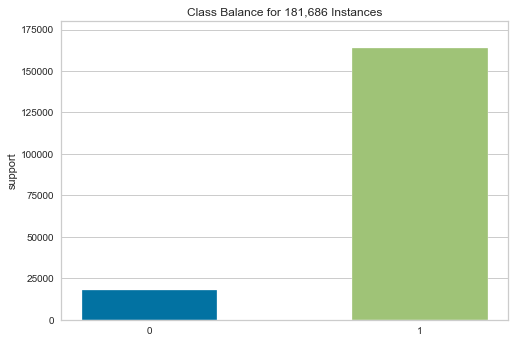

In [109]:
#checking  to see if class labels are balanced

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='good_bad', axis=1)
y = new_df['good_bad']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

from the above chart we that see individuals who are classified as bad borrowers have very few observations, this class imbalance can affect our model when training. To solve this problem we will oversample the minority class

In [110]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
#checking  imbalance data for training dataset
y_train.value_counts()

1    131171
0     14177
Name: good_bad, dtype: int64

In [113]:
#importing libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [114]:
#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)

In [115]:
#check value counts after oversampling
y_train_series.value_counts()

1    131171
0    131171
dtype: int64

In [116]:
#building model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
#predicting
y_preds = model.predict(X_test)

In [118]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.29      0.77      0.42      3647
           1       0.97      0.79      0.87     32691

   micro avg       0.79      0.79      0.79     36338
   macro avg       0.63      0.78      0.65     36338
weighted avg       0.90      0.79      0.82     36338



In [119]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
92427,0,0.263561,0
301099,1,0.653702,1
144862,1,0.845025,1
65169,1,0.573150,1
377589,0,0.531076,1


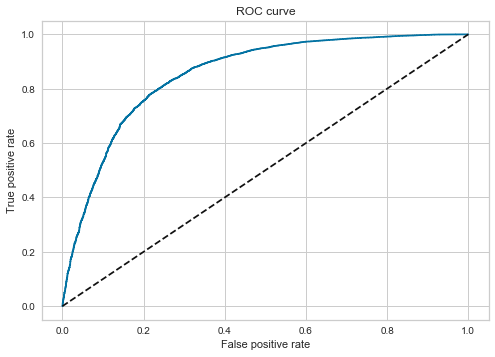

In [120]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [121]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.8535126633859367

model is good

In [122]:
Gini = AUROC * 2 - 1
Gini

0.7070253267718734

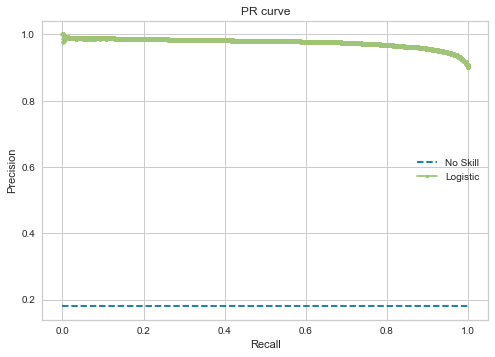

In [123]:
from sklearn.metrics import precision_recall_curve, auc
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [124]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9755973283925609

In [125]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')

In [126]:
actual_predicted_probs_df.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
177606,0,0.003701,0
74545,0,0.004038,0
316665,0,0.005244,0
141343,0,0.005276,0
456727,0,0.005934,0


In [127]:
actual_predicted_probs_df.tail()

,y_test_class_actual,y_hat_test_proba,y_hat_test
288414,1,0.997380,1
308900,1,0.997540,1
237281,1,0.997724,1
297033,1,0.997735,1
250857,1,0.997859,1


In [128]:
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()

In [129]:
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()


In [130]:
actual_predicted_probs_df.head()

,index,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad
0,177606,0,0.003701,0,1,0,1
1,74545,0,0.004038,0,2,0,2
2,316665,0,0.005244,0,3,0,3
3,141343,0,0.005276,0,4,0,4
4,456727,0,0.005934,0,5,0,5


In [131]:
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())

In [132]:
actual_predicted_probs_df.head()

,index,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad,cum_n_%,cum_good_%,cum_bad_%
0,177606,0,0.003701,0,1,0,1,0.000028,0.0,0.000274
1,74545,0,0.004038,0,2,0,2,0.000055,0.0,0.000548
2,316665,0,0.005244,0,3,0,3,0.000083,0.0,0.000823
3,141343,0,0.005276,0,4,0,4,0.000110,0.0,0.001097
4,456727,0,0.005934,0,5,0,5,0.000138,0.0,0.001371


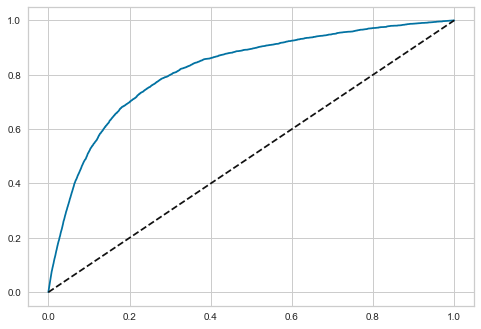

In [133]:
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

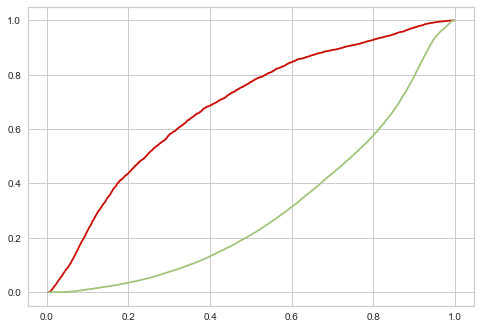

In [134]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')


In [135]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5636528769268644


This is quite good

In [136]:
# saving model 
import pickle
filename = 'credit_risk_model.sav'
pickle.dump(model, open(filename, 'wb'))
